In [14]:
%matplotlib inline
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [20]:
base_dir = '/tmp/data'

In [21]:
hist = pickle.load(open(os.path.join(base_dir, 'acgan-history.pkl'), 'rb'))

## Plot source loss

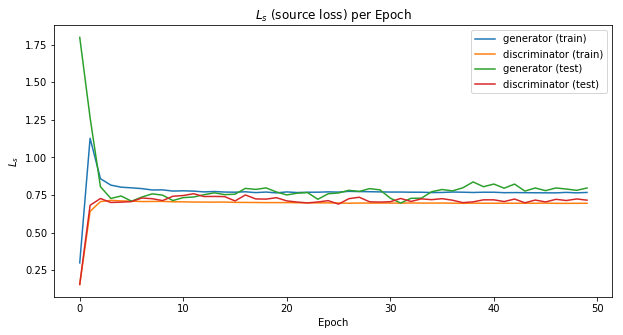

In [23]:
plt.figure(figsize=(10,5))    

for phase in ['train', 'test']:
    for model in ['generator', 'discriminator']:
        v = np.array(hist[phase][model])[:,1][:50]
        plt.plot(v, label='%s (%s)' % (model, phase))

plt.legend()
plt.title(r'$L_s$ (source loss) per Epoch')
plt.xlabel('Epoch')
plt.ylabel(r'$L_s$')
plt.show()

The two networks are jointly trained based on opposing objectives. The goal of the generator is to produce images that are indistinguishable from real images. The goal of the discriminator is to spot the synthetically generated images. The training converges when an equilibrium is reached between both networks, the discriminator should only be able to win in half of the cases. Based on the competition between the two networks and their tight interplay, both networks become more sophisticated at their task.	

## Plot classification loss

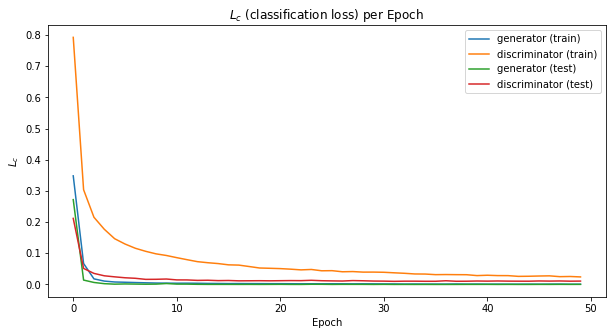

In [25]:
plt.figure(figsize=(10,5))    

for phase in ['train', 'test']:
    for model in ['generator', 'discriminator']:
        v = np.array(hist[phase][model])[:,2][:50]
        plt.plot(v, label='%s (%s)' % (model, phase))

plt.legend()
plt.title(r'$L_c$ (classification loss) per Epoch')
plt.xlabel('Epoch')
plt.ylabel(r'$L_c$')
plt.show()

The classification loss is moving to zero. The generator gets good at generating images that look like the auxiliary class label and the discriminator gets good at predicting the correct image class. 